In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from utils import *
from failures import *

### Base case with grid topology

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...



Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


0-th round
lr 0.1 | average train loss 2.28 | test loss 2.27 | test acc: 0.397
1-th round
lr 0.1 | average train loss 2.08 | test loss 2.01 | test acc: 0.664
2-th round
lr 0.1 | average train loss 1.24 | test loss 0.9 | test acc: 0.796
3-th round
lr 0.1 | average train loss 0.767 | test loss 0.561 | test acc: 0.843
4-th round
lr 0.1 | average train loss 0.624 | test loss 0.423 | test acc: 0.888
5-th round
lr 0.1 | average train loss 0.523 | test loss 0.345 | test acc: 0.906
6-th round
lr 0.1 | average train loss 0.404 | test loss 0.295 | test acc: 0.917
7-th round
lr 0.1 | average train loss 0.381 | test loss 0.26 | test acc: 0.925
8-th round
lr 0.1 | average train loss 0.339 | test loss 0.235 | test acc: 0.931
9-th round
lr 0.1 | average train loss 0.293 | test loss 0.211 | test acc: 0.937
[0.021258, 0.019693, 0.020301, 0.021281, 0.022063, 0.021516, 0.021444, 0.021429, 0.020031, 0.021164, 0.019955, 0.01707, 0.017746, 0.020175, 0.020793, 0.020127, 0.021129, 0.020143, 0.019258, 0.01854,

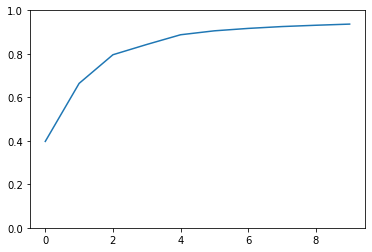

In [2]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs)
plt.show()

### Failure simulation with no correction (no recovery)



normal round
0-th round
lr 0.1 | average train loss 2.26 | test loss 2.26 | test acc: 0.359
normal round
1-th round
lr 0.1 | average train loss 1.78 | test loss 1.59 | test acc: 0.716
normal round
2-th round
lr 0.1 | average train loss 1.08 | test loss 0.757 | test acc: 0.821
normal round
3-th round
lr 0.1 | average train loss 0.826 | test loss 0.536 | test acc: 0.856
normal round
4-th round
lr 0.1 | average train loss 0.631 | test loss 0.416 | test acc: 0.889
failure round
5-th round
lr 0.1 | average train loss 0.464 | test loss 0.338 | test acc: 0.907
failure round
6-th round
lr 0.1 | average train loss 0.417 | test loss 0.289 | test acc: 0.919
failure round
7-th round
lr 0.1 | average train loss 0.376 | test loss 0.256 | test acc: 0.927
failure round
8-th round
lr 0.1 | average train loss 0.342 | test loss 0.23 | test acc: 0.933
failure round
9-th round
lr 0.1 | average train loss 0.293 | test loss 0.209 | test acc: 0.938
[0.024898, 0.021456, 0.022636, 0.026581, 0.045808, 0.025835, 

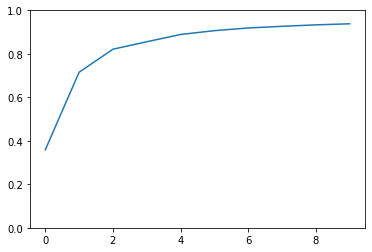

In [3]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 10
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'none')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.26 | test loss 2.25 | test acc: 0.409
normal round
1-th round
lr 0.1 | average train loss 1.76 | test loss 1.51 | test acc: 0.691
normal round
2-th round
lr 0.1 | average train loss 1.12 | test loss 0.798 | test acc: 0.813
normal round
3-th round
lr 0.1 | average train loss 0.82 | test loss 0.55 | test acc: 0.851
normal round
4-th round
lr 0.1 | average train loss 0.592 | test loss 0.419 | test acc: 0.884
failure round
5-th round
lr 0.1 | average train loss 0.541 | test loss 0.354 | test acc: 0.904
failure round
6-th round
lr 0.1 | average train loss 0.444 | test loss 0.298 | test acc: 0.918
failure round
7-th round
lr 0.1 | average train loss 0.393 | test loss 0.262 | test acc: 0.925
failure round
8-th round
lr 0.1 | average train loss 0.32 | test loss 0.235 | test acc: 0.931
failure round
9-th round
lr 0.1 | average train loss 0.335 | test loss 0.219 | test acc: 0.935
[0.032082, 0.023752, 0.02708, 0.023196, 0.022748, 0.022083, 0.0

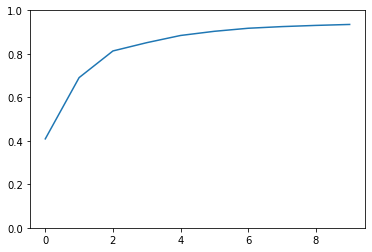

In [4]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 25
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'none')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.28 | test loss 2.27 | test acc: 0.285
normal round
1-th round
lr 0.1 | average train loss 1.96 | test loss 1.84 | test acc: 0.676
normal round
2-th round
lr 0.1 | average train loss 1.29 | test loss 0.901 | test acc: 0.790
normal round
3-th round
lr 0.1 | average train loss 0.846 | test loss 0.562 | test acc: 0.852
normal round
4-th round
lr 0.1 | average train loss 0.624 | test loss 0.415 | test acc: 0.889
failure round
5-th round
lr 0.1 | average train loss 0.484 | test loss 0.329 | test acc: 0.911
failure round
6-th round
lr 0.1 | average train loss 0.439 | test loss 0.288 | test acc: 0.920
failure round
7-th round
lr 0.1 | average train loss 0.373 | test loss 0.251 | test acc: 0.927
failure round
8-th round
lr 0.1 | average train loss 0.323 | test loss 0.228 | test acc: 0.933
failure round
9-th round
lr 0.1 | average train loss 0.276 | test loss 0.208 | test acc: 0.939
[0.033417, 0.040885, 0.031118, 0.041309, 0.052298, 0.048794,

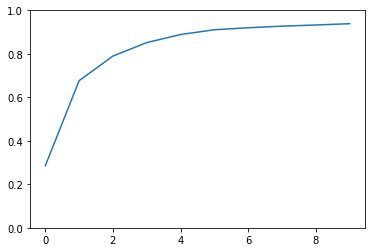

In [5]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 50
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs3 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'none')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs3)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.28 | test loss 2.28 | test acc: 0.217
normal round
1-th round
lr 0.1 | average train loss 2.13 | test loss 2.08 | test acc: 0.567
normal round
2-th round
lr 0.1 | average train loss 1.41 | test loss 1.05 | test acc: 0.786
normal round
3-th round
lr 0.1 | average train loss 0.914 | test loss 0.613 | test acc: 0.847
normal round
4-th round
lr 0.1 | average train loss 0.657 | test loss 0.451 | test acc: 0.884
failure round
5-th round
lr 0.1 | average train loss 0.495 | test loss 0.36 | test acc: 0.903
failure round
6-th round
lr 0.1 | average train loss 0.418 | test loss 0.31 | test acc: 0.914
failure round
7-th round
lr 0.1 | average train loss 0.355 | test loss 0.271 | test acc: 0.923
failure round
8-th round
lr 0.1 | average train loss 0.33 | test loss 0.249 | test acc: 0.928
failure round
9-th round
lr 0.1 | average train loss 0.291 | test loss 0.229 | test acc: 0.931
[0.068124, 0.06954, 0.091359, 0.063792, 0.055948, 0.578145, 0.58

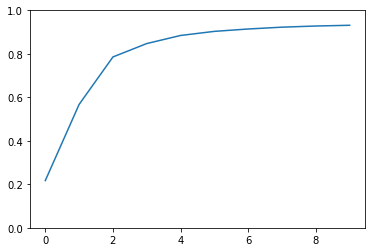

In [6]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 100
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'none')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.28 | test loss 2.27 | test acc: 0.265
normal round
1-th round
lr 0.1 | average train loss 2.04 | test loss 1.97 | test acc: 0.685
normal round
2-th round
lr 0.1 | average train loss 1.29 | test loss 0.988 | test acc: 0.776
normal round
3-th round
lr 0.1 | average train loss 0.824 | test loss 0.64 | test acc: 0.821
normal round
4-th round
lr 0.1 | average train loss 0.659 | test loss 0.49 | test acc: 0.864
failure round
5-th round
lr 0.1 | average train loss 0.505 | test loss 0.403 | test acc: 0.889
failure round
6-th round
lr 0.1 | average train loss 0.37 | test loss 0.352 | test acc: 0.900
failure round
7-th round
lr 0.1 | average train loss 0.307 | test loss 0.323 | test acc: 0.907
failure round
8-th round
lr 0.1 | average train loss 0.249 | test loss 0.299 | test acc: 0.912
failure round
9-th round
lr 0.1 | average train loss 0.164 | test loss 0.287 | test acc: 0.915
[0.761079, 0.446707, 0.435173, 0.418806, 0.48722, 0.457973, 0.5

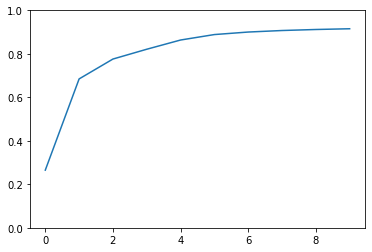

In [7]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 200
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs5 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'none')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs5)
plt.show()

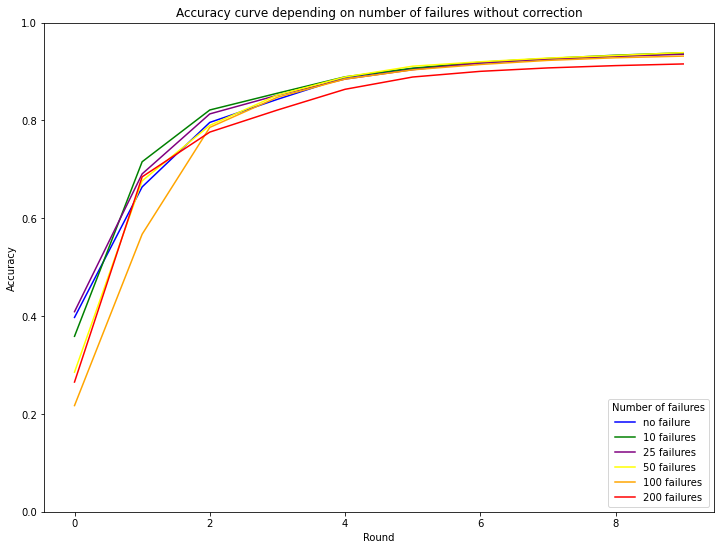

In [8]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="blue", label="no failure")
ax.plot(x, accs1, color="green", label="10 failures")
ax.plot(x, accs2, color="purple", label="25 failures")
ax.plot(x, accs3, color="yellow", label="50 failures")
ax.plot(x, accs4, color="orange", label="100 failures")
ax.plot(x, accs5, color="red", label="200 failures")

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="lower right", title="Number of failures")
plt.title("Accuracy curve depending on number of failures without correction")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()

### Failure simulation with local correction (no recovery)

normal round
0-th round
lr 0.1 | average train loss 2.28 | test loss 2.28 | test acc: 0.336
normal round
1-th round
lr 0.1 | average train loss 2.19 | test loss 2.17 | test acc: 0.470
normal round
2-th round
lr 0.1 | average train loss 1.51 | test loss 1.14 | test acc: 0.748
normal round
3-th round
lr 0.1 | average train loss 0.972 | test loss 0.669 | test acc: 0.823
normal round
4-th round
lr 0.1 | average train loss 0.741 | test loss 0.478 | test acc: 0.872
failure round
5-th round
lr 0.1 | average train loss 0.575 | test loss 0.378 | test acc: 0.897
failure round
6-th round
lr 0.1 | average train loss 0.484 | test loss 0.321 | test acc: 0.911
failure round
7-th round
lr 0.1 | average train loss 0.401 | test loss 0.28 | test acc: 0.919
failure round
8-th round
lr 0.1 | average train loss 0.388 | test loss 0.25 | test acc: 0.927
failure round
9-th round
lr 0.1 | average train loss 0.331 | test loss 0.227 | test acc: 0.932
[0.026611, 0.023148, 0.025256, 0.021833, 0.019817, 0.020193, 0.

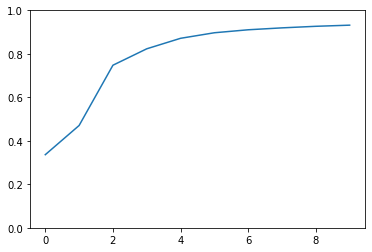

In [9]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 10
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.25 | test loss 2.24 | test acc: 0.341
normal round
1-th round
lr 0.1 | average train loss 1.74 | test loss 1.39 | test acc: 0.756
normal round
2-th round
lr 0.1 | average train loss 1.03 | test loss 0.723 | test acc: 0.819
normal round
3-th round
lr 0.1 | average train loss 0.785 | test loss 0.521 | test acc: 0.864
normal round
4-th round
lr 0.1 | average train loss 0.582 | test loss 0.397 | test acc: 0.891
failure round
5-th round
lr 0.1 | average train loss 0.547 | test loss 0.332 | test acc: 0.912
failure round
6-th round
lr 0.1 | average train loss 0.44 | test loss 0.293 | test acc: 0.917
failure round
7-th round
lr 0.1 | average train loss 0.365 | test loss 0.256 | test acc: 0.927
failure round
8-th round
lr 0.1 | average train loss 0.333 | test loss 0.232 | test acc: 0.933
failure round
9-th round
lr 0.1 | average train loss 0.271 | test loss 0.211 | test acc: 0.936
[0.040598, 0.025374, 0.032844, 0.026293, 0.031826, 0.062754, 

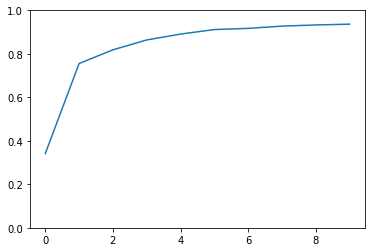

In [10]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 25
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.27 | test loss 2.26 | test acc: 0.460
normal round
1-th round
lr 0.1 | average train loss 1.9 | test loss 1.8 | test acc: 0.657
normal round
2-th round
lr 0.1 | average train loss 1.19 | test loss 0.859 | test acc: 0.783
normal round
3-th round
lr 0.1 | average train loss 0.827 | test loss 0.58 | test acc: 0.845
normal round
4-th round
lr 0.1 | average train loss 0.651 | test loss 0.439 | test acc: 0.884
failure round
5-th round
lr 0.1 | average train loss 0.507 | test loss 0.354 | test acc: 0.902
failure round
6-th round
lr 0.1 | average train loss 0.445 | test loss 0.303 | test acc: 0.916
failure round
7-th round
lr 0.1 | average train loss 0.34 | test loss 0.269 | test acc: 0.923
failure round
8-th round
lr 0.1 | average train loss 0.319 | test loss 0.243 | test acc: 0.928
failure round
9-th round
lr 0.1 | average train loss 0.28 | test loss 0.226 | test acc: 0.932
[0.088198, 0.052702, 0.032011, 0.039115, 0.030803, 0.045106, 0.05

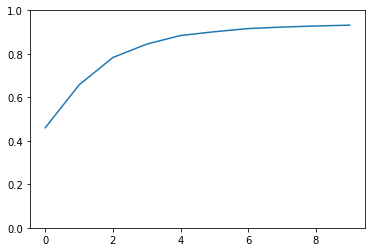

In [11]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 50
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs3 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs3)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.28 | test loss 2.28 | test acc: 0.196
normal round
1-th round
lr 0.1 | average train loss 2.1 | test loss 2.06 | test acc: 0.631
normal round
2-th round
lr 0.1 | average train loss 1.29 | test loss 0.973 | test acc: 0.770
normal round
3-th round
lr 0.1 | average train loss 0.899 | test loss 0.609 | test acc: 0.836
normal round
4-th round
lr 0.1 | average train loss 0.716 | test loss 0.465 | test acc: 0.873
failure round
5-th round
lr 0.1 | average train loss 0.497 | test loss 0.379 | test acc: 0.894
failure round
6-th round
lr 0.1 | average train loss 0.44 | test loss 0.331 | test acc: 0.906
failure round
7-th round
lr 0.1 | average train loss 0.369 | test loss 0.291 | test acc: 0.916
failure round
8-th round
lr 0.1 | average train loss 0.302 | test loss 0.266 | test acc: 0.921
failure round
9-th round
lr 0.1 | average train loss 0.317 | test loss 0.246 | test acc: 0.926
[0.17683, 0.082517, 0.051541, 0.089636, 0.077092, 0.083408, 0.

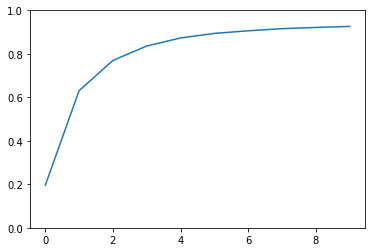

In [12]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 100
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.28 | test loss 2.28 | test acc: 0.271
normal round
1-th round
lr 0.1 | average train loss 2.17 | test loss 2.15 | test acc: 0.472
normal round
2-th round
lr 0.1 | average train loss 1.52 | test loss 1.16 | test acc: 0.768
normal round
3-th round
lr 0.1 | average train loss 0.915 | test loss 0.659 | test acc: 0.842
normal round
4-th round
lr 0.1 | average train loss 0.659 | test loss 0.483 | test acc: 0.874
failure round
5-th round
lr 0.1 | average train loss 0.537 | test loss 0.424 | test acc: 0.885
failure round
6-th round
lr 0.1 | average train loss 0.424 | test loss 0.354 | test acc: 0.903
failure round
7-th round
lr 0.1 | average train loss 0.33 | test loss 0.317 | test acc: 0.911
failure round
8-th round
lr 0.1 | average train loss 0.245 | test loss 0.293 | test acc: 0.916
failure round
9-th round
lr 0.1 | average train loss 0.219 | test loss 0.28 | test acc: 0.918
[0.462967, 0.629058, 0.371898, 0.385678, 0.406404, 0.386518, 0.

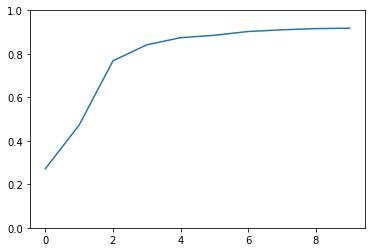

In [13]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 200
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs5 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs5)
plt.show()

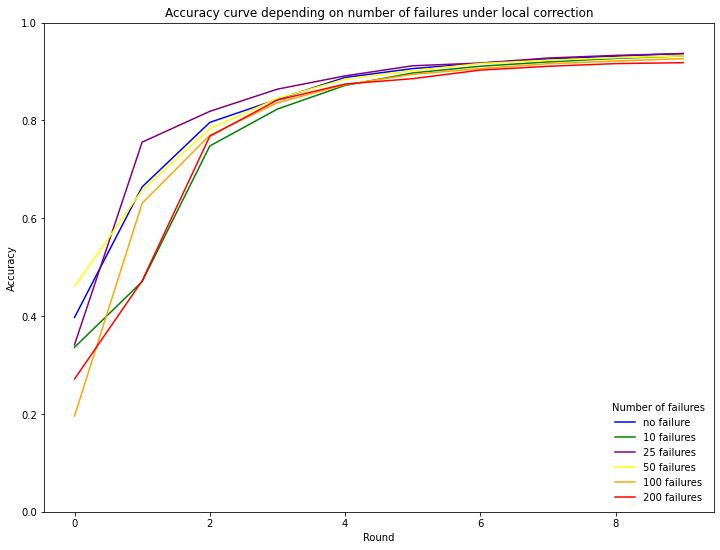

In [14]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="blue", label="no failure")
ax.plot(x, accs1, color="green", label="10 failures")
ax.plot(x, accs2, color="purple", label="25 failures")
ax.plot(x, accs3, color="yellow", label="50 failures")
ax.plot(x, accs4, color="orange", label="100 failures")
ax.plot(x, accs5, color="red", label="200 failures")

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="lower right", title="Number of failures", frameon=False)
plt.title("Accuracy curve depending on number of failures under local correction")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()

### Failure simulation with global correction (no recovery)

normal round
0-th round
lr 0.1 | average train loss 2.27 | test loss 2.27 | test acc: 0.288
normal round
1-th round
lr 0.1 | average train loss 2.08 | test loss 2.03 | test acc: 0.573
normal round
2-th round
lr 0.1 | average train loss 1.31 | test loss 0.974 | test acc: 0.779
normal round
3-th round
lr 0.1 | average train loss 0.872 | test loss 0.613 | test acc: 0.833
normal round
4-th round
lr 0.1 | average train loss 0.667 | test loss 0.453 | test acc: 0.877
failure round
5-th round
lr 0.1 | average train loss 0.556 | test loss 0.363 | test acc: 0.901
failure round
6-th round
lr 0.1 | average train loss 0.457 | test loss 0.303 | test acc: 0.914
failure round
7-th round
lr 0.1 | average train loss 0.413 | test loss 0.269 | test acc: 0.924
failure round
8-th round
lr 0.1 | average train loss 0.356 | test loss 0.24 | test acc: 0.929
failure round
9-th round
lr 0.1 | average train loss 0.329 | test loss 0.218 | test acc: 0.936
[0.031511, 0.02966, 0.022836, 0.019872, 0.020005, 0.021392, 0

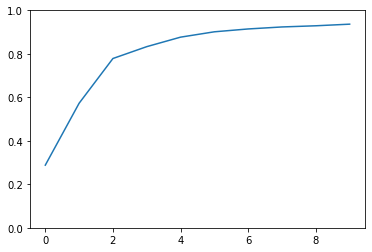

In [15]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 10
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'global')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.25 | test loss 2.24 | test acc: 0.509
normal round
1-th round
lr 0.1 | average train loss 1.7 | test loss 1.41 | test acc: 0.780
normal round
2-th round
lr 0.1 | average train loss 1.14 | test loss 0.753 | test acc: 0.816
normal round
3-th round
lr 0.1 | average train loss 0.763 | test loss 0.516 | test acc: 0.859
normal round
4-th round
lr 0.1 | average train loss 0.597 | test loss 0.398 | test acc: 0.893
failure round
5-th round
lr 0.1 | average train loss 0.526 | test loss 0.326 | test acc: 0.912
failure round
6-th round
lr 0.1 | average train loss 0.397 | test loss 0.284 | test acc: 0.921
failure round
7-th round
lr 0.1 | average train loss 0.371 | test loss 0.25 | test acc: 0.928
failure round
8-th round
lr 0.1 | average train loss 0.315 | test loss 0.227 | test acc: 0.934
failure round
9-th round
lr 0.1 | average train loss 0.277 | test loss 0.208 | test acc: 0.940
[0.030249, 0.024276, 0.022057, 0.022326, 0.024168, 0.030895, 0

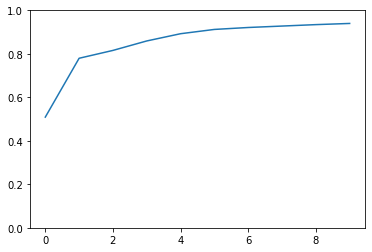

In [16]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 25
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'global')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.29 | test loss 2.28 | test acc: 0.153
normal round
1-th round
lr 0.1 | average train loss 2.21 | test loss 2.19 | test acc: 0.571
normal round
2-th round
lr 0.1 | average train loss 1.61 | test loss 1.29 | test acc: 0.728
normal round
3-th round
lr 0.1 | average train loss 0.95 | test loss 0.69 | test acc: 0.827
normal round
4-th round
lr 0.1 | average train loss 0.789 | test loss 0.484 | test acc: 0.876
failure round
5-th round
lr 0.1 | average train loss 0.577 | test loss 0.388 | test acc: 0.895
failure round
6-th round
lr 0.1 | average train loss 0.489 | test loss 0.325 | test acc: 0.911
failure round
7-th round
lr 0.1 | average train loss 0.432 | test loss 0.284 | test acc: 0.921
failure round
8-th round
lr 0.1 | average train loss 0.377 | test loss 0.255 | test acc: 0.928
failure round
9-th round
lr 0.1 | average train loss 0.329 | test loss 0.234 | test acc: 0.932
[0.025401, 0.022006, 0.029054, 0.030391, 0.053658, 0.034063, 0.

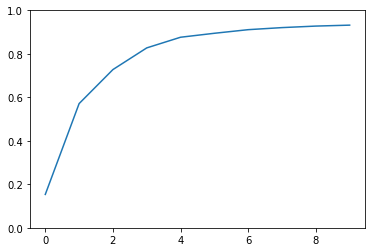

In [17]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 50
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs3 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'global')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs3)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.29 | test loss 2.29 | test acc: 0.103
normal round
1-th round
lr 0.1 | average train loss 2.26 | test loss 2.26 | test acc: 0.395
normal round
2-th round
lr 0.1 | average train loss 2.01 | test loss 1.94 | test acc: 0.685
normal round
3-th round
lr 0.1 | average train loss 1.19 | test loss 0.859 | test acc: 0.811
normal round
4-th round
lr 0.1 | average train loss 0.853 | test loss 0.548 | test acc: 0.863
failure round
5-th round
lr 0.1 | average train loss 0.654 | test loss 0.425 | test acc: 0.889
failure round
6-th round
lr 0.1 | average train loss 0.547 | test loss 0.356 | test acc: 0.904
failure round
7-th round
lr 0.1 | average train loss 0.415 | test loss 0.306 | test acc: 0.916
failure round
8-th round
lr 0.1 | average train loss 0.351 | test loss 0.273 | test acc: 0.923
failure round
9-th round
lr 0.1 | average train loss 0.345 | test loss 0.249 | test acc: 0.929
[0.298962, 0.057052, 0.041361, 0.082621, 0.062631, 0.050136, 0

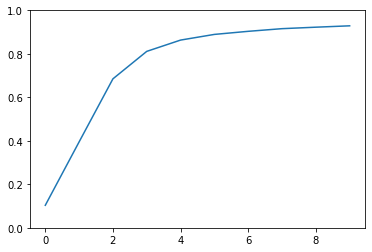

In [18]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 100
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'global')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.23 | test loss 2.21 | test acc: 0.453
normal round
1-th round
lr 0.1 | average train loss 1.55 | test loss 1.25 | test acc: 0.771
normal round
2-th round
lr 0.1 | average train loss 0.97 | test loss 0.706 | test acc: 0.838
normal round
3-th round
lr 0.1 | average train loss 0.665 | test loss 0.513 | test acc: 0.870
normal round
4-th round
lr 0.1 | average train loss 0.577 | test loss 0.423 | test acc: 0.889
failure round
5-th round
lr 0.1 | average train loss 0.44 | test loss 0.358 | test acc: 0.902
failure round
6-th round
lr 0.1 | average train loss 0.31 | test loss 0.319 | test acc: 0.910
failure round
7-th round
lr 0.1 | average train loss 0.212 | test loss 0.293 | test acc: 0.915
failure round
8-th round
lr 0.1 | average train loss 0.206 | test loss 0.28 | test acc: 0.919
failure round
9-th round
lr 0.1 | average train loss 0.143 | test loss 0.273 | test acc: 0.922
[0.480866, 0.594235, 0.575681, 0.453541, 0.551237, 0.525244, 0.

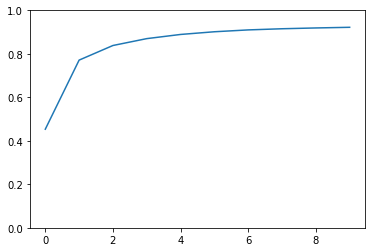

In [19]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 200
failure_round = 5

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs5 = run_failures_no_recovery(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_round, num_failures, 'global')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs5)
plt.show()

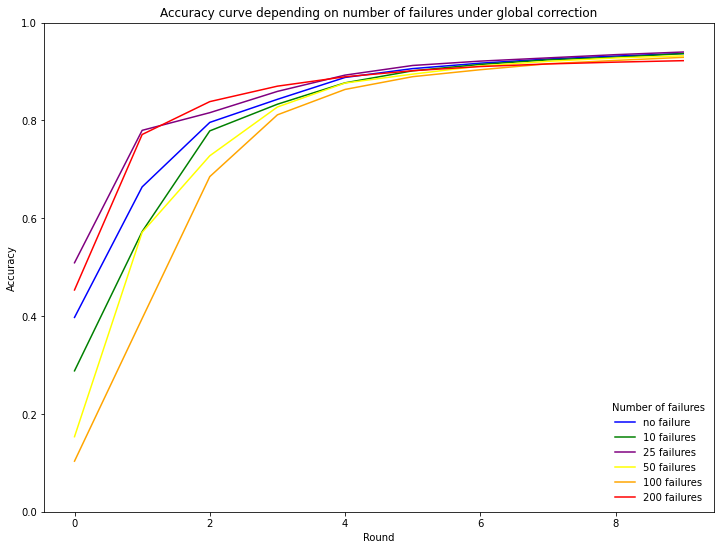

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="blue", label="no failure")
ax.plot(x, accs1, color="green", label="10 failures")
ax.plot(x, accs2, color="purple", label="25 failures")
ax.plot(x, accs3, color="yellow", label="50 failures")
ax.plot(x, accs4, color="orange", label="100 failures")
ax.plot(x, accs5, color="red", label="200 failures")

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="lower right", title="Number of failures", frameon=False)
plt.title("Accuracy curve depending on number of failures under global correction")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()

### Failure simulation with no correction (recovery)

failure round
0-th round
lr 0.1 | average train loss 2.28 | test loss 2.28 | test acc: 0.208
failure round
1-th round
lr 0.1 | average train loss 2.13 | test loss 2.09 | test acc: 0.611
normal round
2-th round
lr 0.1 | average train loss 1.32 | test loss 0.987 | test acc: 0.781
normal round
3-th round
lr 0.1 | average train loss 0.887 | test loss 0.608 | test acc: 0.848
failure round
4-th round
lr 0.1 | average train loss 0.679 | test loss 0.452 | test acc: 0.880
failure round
5-th round
lr 0.1 | average train loss 0.569 | test loss 0.367 | test acc: 0.902
failure round
6-th round
lr 0.1 | average train loss 0.485 | test loss 0.313 | test acc: 0.914
normal round
7-th round
lr 0.1 | average train loss 0.394 | test loss 0.276 | test acc: 0.922
normal round
8-th round
lr 0.1 | average train loss 0.362 | test loss 0.248 | test acc: 0.930
normal round
9-th round
lr 0.1 | average train loss 0.303 | test loss 0.227 | test acc: 0.933
[0.024767, 0.02257, 0.021259, 0.029705, 0.031201, 0.026222, 

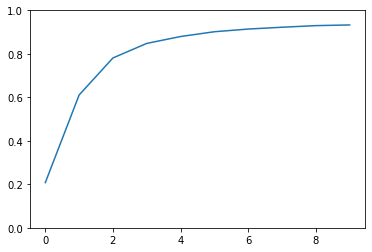

In [21]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 10
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'none')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.28 | test loss 2.28 | test acc: 0.267
failure round
1-th round
lr 0.1 | average train loss 2.11 | test loss 2.05 | test acc: 0.601
normal round
2-th round
lr 0.1 | average train loss 1.28 | test loss 0.95 | test acc: 0.781
failure round
3-th round
lr 0.1 | average train loss 0.909 | test loss 0.641 | test acc: 0.818
normal round
4-th round
lr 0.1 | average train loss 0.694 | test loss 0.456 | test acc: 0.878
failure round
5-th round
lr 0.1 | average train loss 0.584 | test loss 0.371 | test acc: 0.896
failure round
6-th round
lr 0.1 | average train loss 0.476 | test loss 0.319 | test acc: 0.907
normal round
7-th round
lr 0.1 | average train loss 0.386 | test loss 0.277 | test acc: 0.920
failure round
8-th round
lr 0.1 | average train loss 0.352 | test loss 0.248 | test acc: 0.927
normal round
9-th round
lr 0.1 | average train loss 0.315 | test loss 0.229 | test acc: 0.931
[0.025056, 0.023406, 0.025555, 0.036793, 0.041888, 0.029875, 

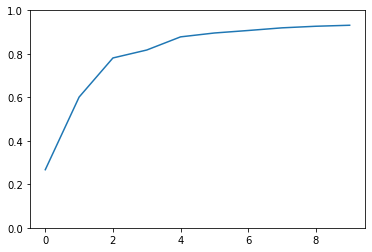

In [22]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 25
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'none')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.26 | test loss 2.25 | test acc: 0.324
normal round
1-th round
lr 0.1 | average train loss 1.83 | test loss 1.61 | test acc: 0.708
failure round
2-th round
lr 0.1 | average train loss 1.08 | test loss 0.784 | test acc: 0.789
normal round
3-th round
lr 0.1 | average train loss 0.814 | test loss 0.545 | test acc: 0.853
normal round
4-th round
lr 0.1 | average train loss 0.625 | test loss 0.444 | test acc: 0.877
failure round
5-th round
lr 0.1 | average train loss 0.555 | test loss 0.352 | test acc: 0.905
failure round
6-th round
lr 0.1 | average train loss 0.457 | test loss 0.303 | test acc: 0.916
failure round
7-th round
lr 0.1 | average train loss 0.378 | test loss 0.274 | test acc: 0.922
normal round
8-th round
lr 0.1 | average train loss 0.349 | test loss 0.24 | test acc: 0.930
failure round
9-th round
lr 0.1 | average train loss 0.322 | test loss 0.222 | test acc: 0.935
[0.056124, 0.035642, 0.026615, 0.035038, 0.030674, 0.028117, 

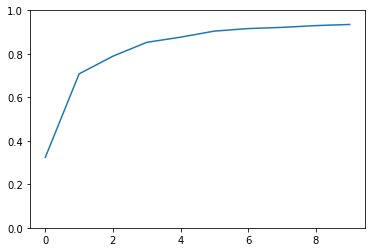

In [23]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 50
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs3 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'none')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs3)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.28 | test loss 2.27 | test acc: 0.364
normal round
1-th round
lr 0.1 | average train loss 2.09 | test loss 2.04 | test acc: 0.543
failure round
2-th round
lr 0.1 | average train loss 1.38 | test loss 1.02 | test acc: 0.766
failure round
3-th round
lr 0.1 | average train loss 0.897 | test loss 0.635 | test acc: 0.825
failure round
4-th round
lr 0.1 | average train loss 0.677 | test loss 0.492 | test acc: 0.867
failure round
5-th round
lr 0.1 | average train loss 0.576 | test loss 0.393 | test acc: 0.892
normal round
6-th round
lr 0.1 | average train loss 0.496 | test loss 0.336 | test acc: 0.907
normal round
7-th round
lr 0.1 | average train loss 0.383 | test loss 0.292 | test acc: 0.918
failure round
8-th round
lr 0.1 | average train loss 0.362 | test loss 0.263 | test acc: 0.924
normal round
9-th round
lr 0.1 | average train loss 0.331 | test loss 0.24 | test acc: 0.930
[0.036803, 0.035145, 0.034529, 0.038144, 0.048862, 0.484675, 0

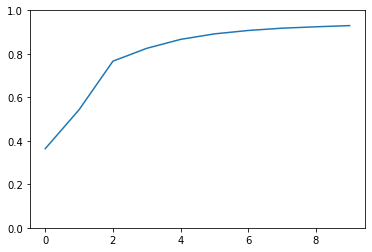

In [24]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 100
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'none')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.29 | test loss 2.29 | test acc: 0.242
failure round
1-th round
lr 0.1 | average train loss 2.23 | test loss 2.22 | test acc: 0.489
failure round
2-th round
lr 0.1 | average train loss 1.66 | test loss 1.44 | test acc: 0.723
failure round
3-th round
lr 0.1 | average train loss 1.02 | test loss 0.776 | test acc: 0.807
normal round
4-th round
lr 0.1 | average train loss 0.729 | test loss 0.564 | test acc: 0.852
normal round
5-th round
lr 0.1 | average train loss 0.526 | test loss 0.438 | test acc: 0.879
normal round
6-th round
lr 0.1 | average train loss 0.485 | test loss 0.382 | test acc: 0.898
failure round
7-th round
lr 0.1 | average train loss 0.326 | test loss 0.338 | test acc: 0.906
failure round
8-th round
lr 0.1 | average train loss 0.279 | test loss 0.304 | test acc: 0.915
normal round
9-th round
lr 0.1 | average train loss 0.209 | test loss 0.288 | test acc: 0.917
[0.405293, 0.432701, 0.456955, 0.433717, 0.458952, 0.435602, 0

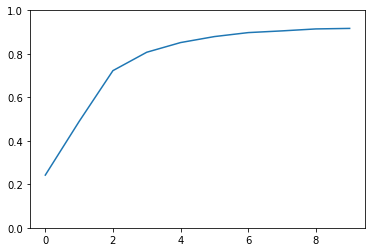

In [25]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 200
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs5 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'none')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs5)
plt.show()

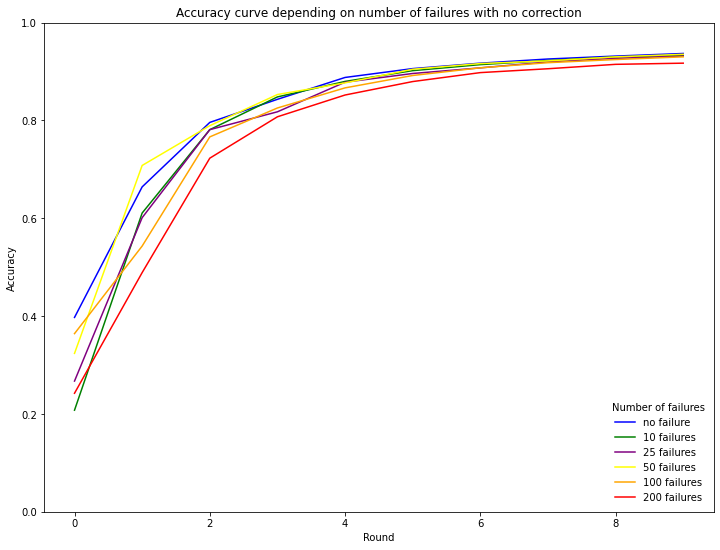

In [26]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="blue", label="no failure")
ax.plot(x, accs1, color="green", label="10 failures")
ax.plot(x, accs2, color="purple", label="25 failures")
ax.plot(x, accs3, color="yellow", label="50 failures")
ax.plot(x, accs4, color="orange", label="100 failures")
ax.plot(x, accs5, color="red", label="200 failures")

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="lower right", title="Number of failures", frameon=False)
plt.title("Accuracy curve depending on number of failures with no correction")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()

### Failure simulation with local correction (recovery)

failure round
0-th round
lr 0.1 | average train loss 2.22 | test loss 2.21 | test acc: 0.487
normal round
1-th round
lr 0.1 | average train loss 1.56 | test loss 1.21 | test acc: 0.760
failure round
2-th round
lr 0.1 | average train loss 0.964 | test loss 0.677 | test acc: 0.816
normal round
3-th round
lr 0.1 | average train loss 0.724 | test loss 0.475 | test acc: 0.872
normal round
4-th round
lr 0.1 | average train loss 0.59 | test loss 0.382 | test acc: 0.898
failure round
5-th round
lr 0.1 | average train loss 0.478 | test loss 0.323 | test acc: 0.912
normal round
6-th round
lr 0.1 | average train loss 0.418 | test loss 0.285 | test acc: 0.919
normal round
7-th round
lr 0.1 | average train loss 0.382 | test loss 0.248 | test acc: 0.929
failure round
8-th round
lr 0.1 | average train loss 0.327 | test loss 0.227 | test acc: 0.933
failure round
9-th round
lr 0.1 | average train loss 0.328 | test loss 0.207 | test acc: 0.937
[0.027909, 0.023796, 0.021589, 0.022668, 0.021426, 0.020989,

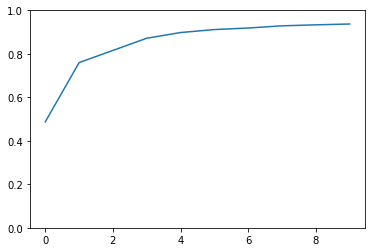

In [27]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 10
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1)
plt.show()

failure round
0-th round
lr 0.1 | average train loss 2.26 | test loss 2.25 | test acc: 0.390
failure round
1-th round
lr 0.1 | average train loss 1.75 | test loss 1.54 | test acc: 0.680
failure round
2-th round
lr 0.1 | average train loss 1.1 | test loss 0.797 | test acc: 0.792
normal round
3-th round
lr 0.1 | average train loss 0.798 | test loss 0.55 | test acc: 0.849
normal round
4-th round
lr 0.1 | average train loss 0.643 | test loss 0.425 | test acc: 0.884
normal round
5-th round
lr 0.1 | average train loss 0.49 | test loss 0.352 | test acc: 0.903
failure round
6-th round
lr 0.1 | average train loss 0.508 | test loss 0.305 | test acc: 0.914
failure round
7-th round
lr 0.1 | average train loss 0.398 | test loss 0.265 | test acc: 0.923
normal round
8-th round
lr 0.1 | average train loss 0.351 | test loss 0.241 | test acc: 0.929
normal round
9-th round
lr 0.1 | average train loss 0.318 | test loss 0.218 | test acc: 0.934
[0.026918, 0.023045, 0.020581, 0.019364, 0.0248, 0.028764, 0.04

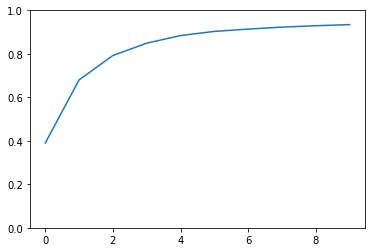

In [28]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 25
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

failure round
0-th round
lr 0.1 | average train loss 2.26 | test loss 2.26 | test acc: 0.325
failure round
1-th round
lr 0.1 | average train loss 1.81 | test loss 1.64 | test acc: 0.735
failure round
2-th round
lr 0.1 | average train loss 1.15 | test loss 0.799 | test acc: 0.816
failure round
3-th round
lr 0.1 | average train loss 0.779 | test loss 0.537 | test acc: 0.857
normal round
4-th round
lr 0.1 | average train loss 0.691 | test loss 0.432 | test acc: 0.885
failure round
5-th round
lr 0.1 | average train loss 0.519 | test loss 0.344 | test acc: 0.907
normal round
6-th round
lr 0.1 | average train loss 0.472 | test loss 0.304 | test acc: 0.915
normal round
7-th round
lr 0.1 | average train loss 0.366 | test loss 0.267 | test acc: 0.923
normal round
8-th round
lr 0.1 | average train loss 0.337 | test loss 0.243 | test acc: 0.928
normal round
9-th round
lr 0.1 | average train loss 0.291 | test loss 0.22 | test acc: 0.935
[0.034292, 0.063313, 0.062891, 0.031254, 0.030995, 0.039952, 

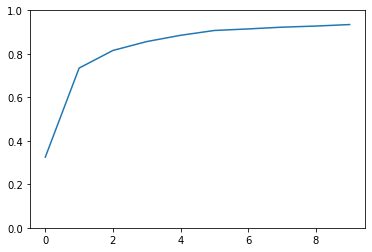

In [29]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 50
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs3 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs3)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.28 | test loss 2.28 | test acc: 0.268
failure round
1-th round
lr 0.1 | average train loss 2.16 | test loss 2.13 | test acc: 0.610
normal round
2-th round
lr 0.1 | average train loss 1.45 | test loss 1.07 | test acc: 0.785
failure round
3-th round
lr 0.1 | average train loss 0.937 | test loss 0.646 | test acc: 0.837
failure round
4-th round
lr 0.1 | average train loss 0.697 | test loss 0.496 | test acc: 0.865
normal round
5-th round
lr 0.1 | average train loss 0.571 | test loss 0.403 | test acc: 0.892
failure round
6-th round
lr 0.1 | average train loss 0.434 | test loss 0.34 | test acc: 0.906
normal round
7-th round
lr 0.1 | average train loss 0.385 | test loss 0.297 | test acc: 0.916
failure round
8-th round
lr 0.1 | average train loss 0.317 | test loss 0.271 | test acc: 0.922
normal round
9-th round
lr 0.1 | average train loss 0.284 | test loss 0.249 | test acc: 0.927
[0.088258, 0.08428, 0.104636, 0.063062, 0.058369, 0.097546, 0.

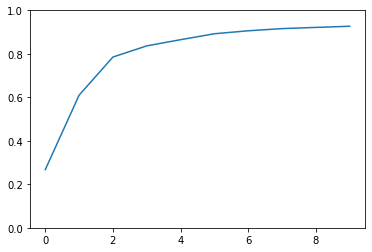

In [30]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 100
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4)
plt.show()

normal round
0-th round
lr 0.1 | average train loss 2.25 | test loss 2.24 | test acc: 0.400
normal round
1-th round
lr 0.1 | average train loss 1.67 | test loss 1.38 | test acc: 0.742
failure round
2-th round
lr 0.1 | average train loss 1.02 | test loss 0.746 | test acc: 0.817
failure round
3-th round
lr 0.1 | average train loss 0.715 | test loss 0.559 | test acc: 0.843
failure round
4-th round
lr 0.1 | average train loss 0.575 | test loss 0.451 | test acc: 0.876
failure round
5-th round
lr 0.1 | average train loss 0.44 | test loss 0.378 | test acc: 0.894
normal round
6-th round
lr 0.1 | average train loss 0.329 | test loss 0.334 | test acc: 0.905
failure round
7-th round
lr 0.1 | average train loss 0.266 | test loss 0.306 | test acc: 0.910
normal round
8-th round
lr 0.1 | average train loss 0.199 | test loss 0.295 | test acc: 0.913
normal round
9-th round
lr 0.1 | average train loss 0.147 | test loss 0.285 | test acc: 0.915
[0.500579, 0.513371, 0.429482, 0.49025, 0.430809, 0.589203, 0

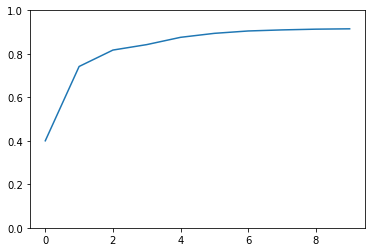

In [31]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 200
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs5 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs5)
plt.show()

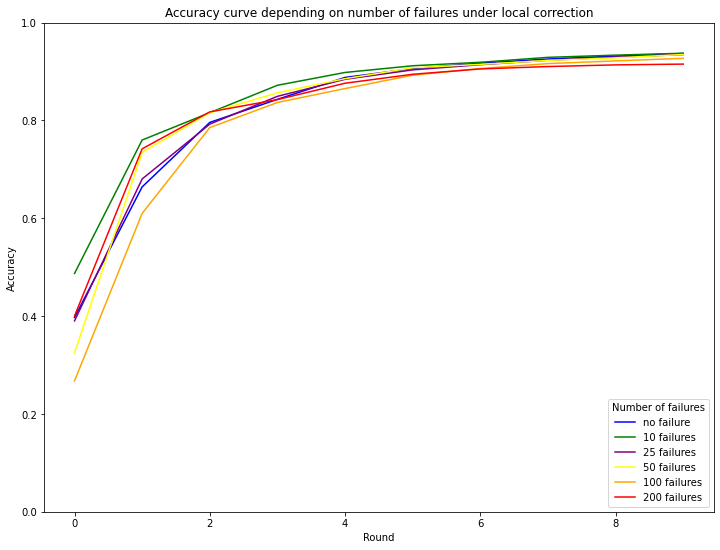

In [32]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="blue", label="no failure")
ax.plot(x, accs1, color="green", label="10 failures")
ax.plot(x, accs2, color="purple", label="25 failures")
ax.plot(x, accs3, color="yellow", label="50 failures")
ax.plot(x, accs4, color="orange", label="100 failures")
ax.plot(x, accs5, color="red", label="200 failures")

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="lower right", title="Number of failures")
plt.title("Accuracy curve depending on number of failures under local correction")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()

### Failure simulation with global correction (recovery)

failure round
0-th round
lr 0.1 | average train loss 2.27 | test loss 2.26 | test acc: 0.268
normal round
1-th round
lr 0.1 | average train loss 1.99 | test loss 1.89 | test acc: 0.568
failure round
2-th round
lr 0.1 | average train loss 1.21 | test loss 0.897 | test acc: 0.768
failure round
3-th round
lr 0.1 | average train loss 0.795 | test loss 0.562 | test acc: 0.851
normal round
4-th round
lr 0.1 | average train loss 0.631 | test loss 0.427 | test acc: 0.886
normal round
5-th round
lr 0.1 | average train loss 0.502 | test loss 0.344 | test acc: 0.906
failure round
6-th round
lr 0.1 | average train loss 0.43 | test loss 0.29 | test acc: 0.918
failure round
7-th round
lr 0.1 | average train loss 0.384 | test loss 0.259 | test acc: 0.926
normal round
8-th round
lr 0.1 | average train loss 0.313 | test loss 0.233 | test acc: 0.932
normal round
9-th round
lr 0.1 | average train loss 0.308 | test loss 0.211 | test acc: 0.937
[0.02187, 0.021535, 0.024203, 0.025883, 0.023342, 0.022624, 0.

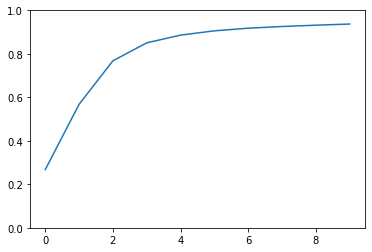

In [33]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 10
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'global')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1)
plt.show()

failure round
0-th round
lr 0.1 | average train loss 2.23 | test loss 2.22 | test acc: 0.546
failure round
1-th round
lr 0.1 | average train loss 1.65 | test loss 1.29 | test acc: 0.726
failure round
2-th round
lr 0.1 | average train loss 1.05 | test loss 0.725 | test acc: 0.811
normal round
3-th round
lr 0.1 | average train loss 0.754 | test loss 0.498 | test acc: 0.869
normal round
4-th round
lr 0.1 | average train loss 0.602 | test loss 0.399 | test acc: 0.892
normal round
5-th round
lr 0.1 | average train loss 0.54 | test loss 0.323 | test acc: 0.913
failure round
6-th round
lr 0.1 | average train loss 0.428 | test loss 0.287 | test acc: 0.920
failure round
7-th round
lr 0.1 | average train loss 0.342 | test loss 0.25 | test acc: 0.929
normal round
8-th round
lr 0.1 | average train loss 0.35 | test loss 0.23 | test acc: 0.934
normal round
9-th round
lr 0.1 | average train loss 0.271 | test loss 0.211 | test acc: 0.938
[0.052452, 0.03538, 0.028156, 0.024813, 0.027495, 0.055967, 0.04

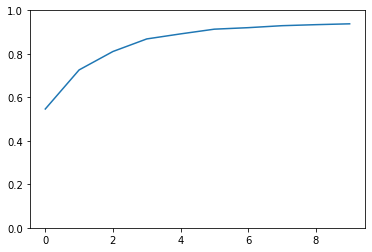

In [34]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 25
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'global')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

failure round
0-th round
lr 0.1 | average train loss 2.24 | test loss 2.23 | test acc: 0.350
normal round
1-th round
lr 0.1 | average train loss 1.65 | test loss 1.31 | test acc: 0.746
normal round
2-th round
lr 0.1 | average train loss 1.03 | test loss 0.727 | test acc: 0.802
normal round
3-th round
lr 0.1 | average train loss 0.662 | test loss 0.489 | test acc: 0.868
failure round
4-th round
lr 0.1 | average train loss 0.557 | test loss 0.392 | test acc: 0.893
normal round
5-th round
lr 0.1 | average train loss 0.506 | test loss 0.324 | test acc: 0.911
failure round
6-th round
lr 0.1 | average train loss 0.374 | test loss 0.278 | test acc: 0.921
normal round
7-th round
lr 0.1 | average train loss 0.332 | test loss 0.249 | test acc: 0.929
failure round
8-th round
lr 0.1 | average train loss 0.333 | test loss 0.226 | test acc: 0.935
failure round
9-th round
lr 0.1 | average train loss 0.281 | test loss 0.208 | test acc: 0.938
[0.02814, 0.025037, 0.025757, 0.033772, 0.060373, 0.042212, 

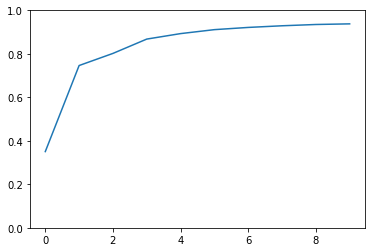

In [35]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 50
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs3 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'global')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs3)
plt.show()

failure round
0-th round
lr 0.1 | average train loss 2.26 | test loss 2.25 | test acc: 0.359
failure round
1-th round
lr 0.1 | average train loss 1.74 | test loss 1.5 | test acc: 0.726
failure round
2-th round
lr 0.1 | average train loss 1.04 | test loss 0.745 | test acc: 0.814
normal round
3-th round
lr 0.1 | average train loss 0.752 | test loss 0.515 | test acc: 0.866
failure round
4-th round
lr 0.1 | average train loss 0.595 | test loss 0.408 | test acc: 0.891
failure round
5-th round
lr 0.1 | average train loss 0.498 | test loss 0.341 | test acc: 0.908
normal round
6-th round
lr 0.1 | average train loss 0.384 | test loss 0.297 | test acc: 0.916
normal round
7-th round
lr 0.1 | average train loss 0.351 | test loss 0.267 | test acc: 0.923
normal round
8-th round
lr 0.1 | average train loss 0.311 | test loss 0.243 | test acc: 0.928
normal round
9-th round
lr 0.1 | average train loss 0.28 | test loss 0.224 | test acc: 0.932
[0.067813, 0.06829, 0.056803, 0.101219, 0.076126, 0.047443, 0.

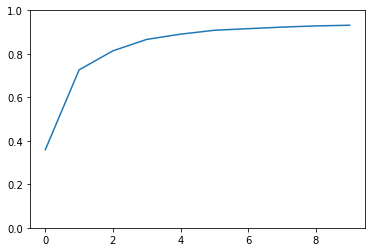

In [36]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 100
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'global')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4)
plt.show()

failure round
0-th round
lr 0.1 | average train loss 2.27 | test loss 2.27 | test acc: 0.261
normal round
1-th round
lr 0.1 | average train loss 1.95 | test loss 1.87 | test acc: 0.660
normal round
2-th round
lr 0.1 | average train loss 1.17 | test loss 0.868 | test acc: 0.807
normal round
3-th round
lr 0.1 | average train loss 0.779 | test loss 0.6 | test acc: 0.842
failure round
4-th round
lr 0.1 | average train loss 0.585 | test loss 0.463 | test acc: 0.876
failure round
5-th round
lr 0.1 | average train loss 0.451 | test loss 0.392 | test acc: 0.893
failure round
6-th round
lr 0.1 | average train loss 0.348 | test loss 0.333 | test acc: 0.910
failure round
7-th round
lr 0.1 | average train loss 0.297 | test loss 0.307 | test acc: 0.913
normal round
8-th round
lr 0.1 | average train loss 0.204 | test loss 0.285 | test acc: 0.919
normal round
9-th round
lr 0.1 | average train loss 0.18 | test loss 0.274 | test acc: 0.922
[0.498819, 0.472826, 0.486522, 0.427178, 0.520437, 0.466923, 0.

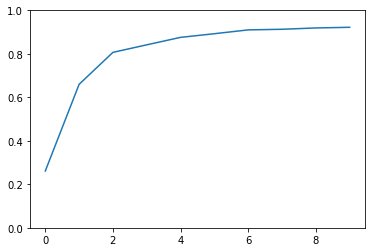

In [37]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
num_failures = 200
failure_rounds = np.random.choice(range(num_rounds), size=5, replace=False)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs5 = run_failures(train_loader, test_loader, comm_matrix, num_rounds,
                                                             epochs, num_clients, failure_rounds, num_failures, 'global')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs5)
plt.show()

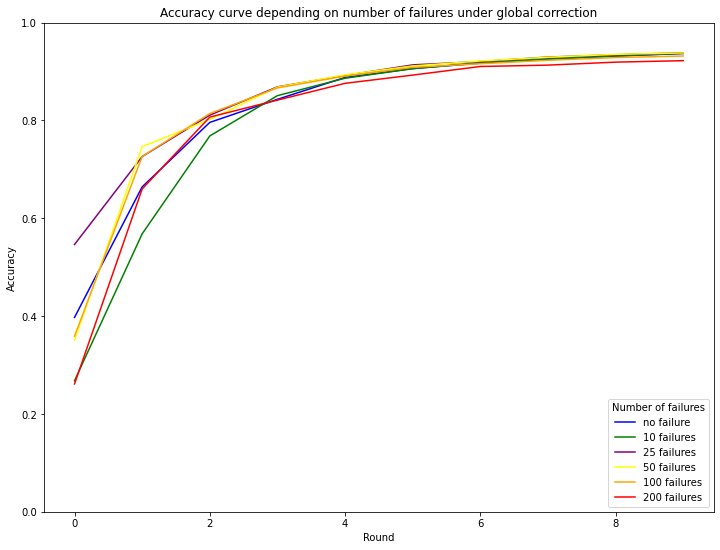

In [38]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="blue", label="no failure")
ax.plot(x, accs1, color="green", label="10 failures")
ax.plot(x, accs2, color="purple", label="25 failures")
ax.plot(x, accs3, color="yellow", label="50 failures")
ax.plot(x, accs4, color="orange", label="100 failures")
ax.plot(x, accs5, color="red", label="200 failures")

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="lower right", title="Number of failures")
plt.title("Accuracy curve depending on number of failures under global correction")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()